<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Tare_de_minimos_cuadrados_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MÉTODO DE MÍNIMOS CUADRADOS

Resolver el problema de valor inicial

$$u'' +u= x \qquad u(0)=0, \qquad u'(0)=2 $$
Buacaremos una solución aproximada usando el método de mínimos cuadrados, empleando la fución de prueba de la forma:

$$
u_N(x)=\alpha_0+\alpha_1 x+\alpha_2 x^2+\alpha_3 x^3.
$$

Por otro lado usando las condiciones iniciales para determinar los coeficientes $\alpha_0$ y $α_1$ y además compararemos la solución númerica con la analitica (exacta) y finalmente calcularemos el error de la aproximación.

En este ejercicio aplicamos el método de mínimos cuadrados para obtener una solución aproximada del problema de valor inicial.

$$u'' + u = x, \qquad u(0)=0, \quad u'(0)=2.
$$

A diferencia de los problemas de frontera, aquí usamos una función de prueba polinomial:

$$u_N(x)=\alpha_0+\alpha_1 x+\alpha_2 x^2+\alpha_3 x^3.
$$

Las condiciones iniciales permiten fijar:

$$
\alpha_0 = 0, \qquad \alpha_1 = 2.
$$

Por lo tanto los parametros desconocidos son: $\alpha_2,\quad \alpha_3.$

Ele métodod de mínimos cuadrados consiste en minimizar la integral del residuo al cuadrado:

$$ I(\alpha_2,\alpha_3)=\int_0^1 \left( u_N''(x)+u_N(x)-x \right)^2 dx.
$$


Para encontrar el mínimo resolveremos:

$$
\frac{\partial I}{\partial \alpha_2}=0, \qquad
\frac{\partial I}{\partial \alpha_3}=0.
$$

Fimalmente, compararemos la solución aproximada con la solución exacta y calculamos el error.




In [82]:
#importamos librerias

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [83]:
#Definimos la variable simbólica y función
x=sp.symbols('x')
a,b = sp.symbols('a b') #son los aplha siendo los coeficientes desconocidos
u= sp.Function('u')

In [84]:
#Ecuación diferencial u''+u -x =0
ode = u(x).diff(x,x)+u(x)-x
sp.dsolve(ode,u(x))  #resuelve la ecuación

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [85]:
#resolver con las condiciones iniciales
sol_exact = sp.dsolve(ode, ics={u(0):0 , sp.diff(u(x),x).subs(x,0):2})

In [86]:
print("Solución exacta simbólica:")
sol_exact #muestra la solución exacta

Solución exacta simbólica:


Eq(u(x), x + sin(x))

In [87]:
#convertimos la solución simbolica a función numérica
u_exact_expr = sol_exact.rhs # # parte derecha (right-hand side) de solucion

u_exact = sp.lambdify(x,u_exact_expr, "numpy")


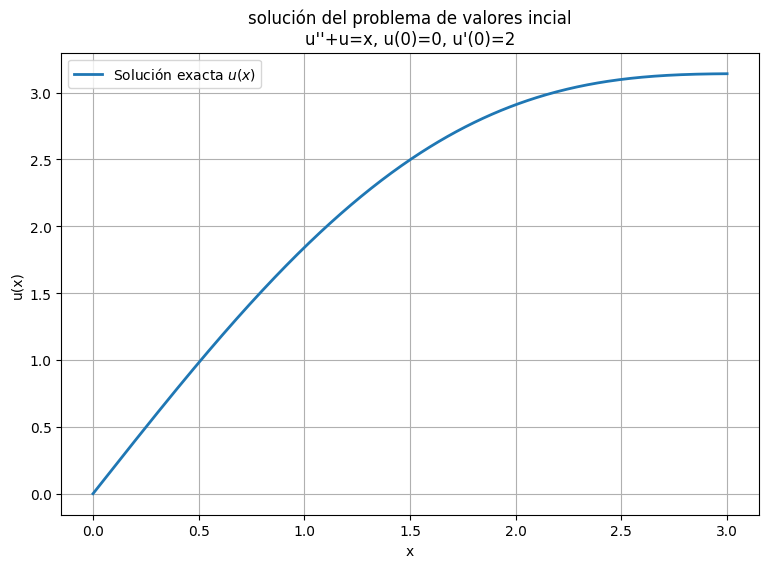

In [88]:
#malla para graficar
xx= np.linspace(0,3,500)
yy= u_exact(xx)

#Grafica
plt.figure(figsize=(9,6))
plt.plot(xx,yy, label = "Solución exacta $u(x)$", linewidth=2)
plt.title("solución del problema de valores incial\nu''+u=x, u(0)=0, u'(0)=2")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()

##SOLUCIÓN NÚMERICA

In [89]:

#definimos la función de prueba u_n(x) que cumple u(0)=u(1)=0
#Polinomio cúbico que ya cumple las condiciones iniciales
u_N= 2*x + a*x**2 + b*x**3


print("\nFunción de prueba (polinomio cúbico):")
u_N




Función de prueba (polinomio cúbico):


a*x**2 + b*x**3 + 2*x

Definimos el residuo o error E

In [90]:
u_N_2= sp.diff(u_N, x ,2) #calculo de la segunda derivada
u_N_2

2*(a + 3*b*x)

In [91]:
#E(x)
E= u_N_2 + u_N -x
E

a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

In [92]:
E.simplify()

a*x**2 + 2*a + b*x**3 + 6*b*x + x

Imponemos las condiciones para obtener los puntos criticos del residuo:

$$\frac{\partial}{\partial a} ∫_0^1 E^2 dx= 0$$

$$\frac{\partial}{\partial b} ∫_0^1 E^2 dx= 0$$

Y resolvemos el sistema de ecuaciones resultantes

In [93]:
#Integral del cuadrado del residual del intervalo de [0,1]
I = sp.integrate( E**2, (x,0,1))
I

83*a**2/15 + 49*a*b/3 + 5*a/2 + 509*b**2/35 + 22*b/5 + 1/3

In [94]:
dI_a = sp.diff(I,a)
dI_b= sp.diff(I,b)

In [95]:
#otra forma de imprimir

print (dI_a, "\n", dI_b)

166*a/15 + 49*b/3 + 5/2 
 49*a/3 + 1018*b/35 + 22/5


In [96]:
#para igualar a 0
soleq = sp.solve ([dI_a, dI_b], [a,b], simplify=True)
print("\nSolución del sistema (para conocer a y b):")

soleq


Solución del sistema (para conocer a y b):


{a: -1335/86789, b: -24759/173578}

In [97]:
#sustituir en la función de prueba
u_approx = E.subs (soleq)
u_approx

-24759*x**3/173578 - 1335*x**2/86789 + 12512*x/86789 - 2670/86789

In [98]:
u_approx_fn =sp.lambdify(x,u_approx, "numpy")

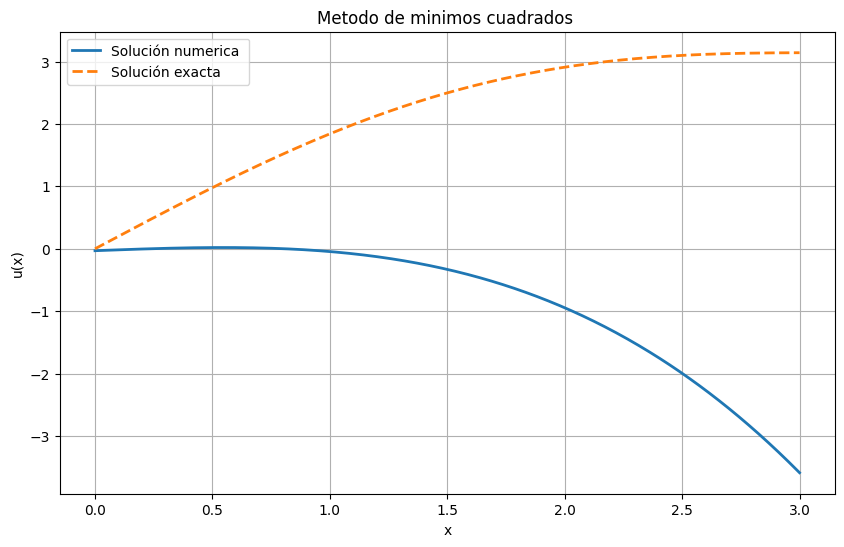

In [104]:
xx= np.linspace(0,3,500)


plt.figure(figsize=(10,6))
plt.plot(xx, u_approx_fn(xx) , label = "Solución numerica ", linewidth=2)
plt.plot(xx, yy,"--", label = "Solución exacta", linewidth=2) #-- tipo de linea punteada

plt.title("Metodo de minimos cuadrados ")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()